In [4]:
# The import statement will vary depending on your LLM and vector database. This is an example for OpenAI + ChromaDB

from vanna.openai.openai_chat import OpenAI_Chat
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, config=config)

vn = MyVanna(config={'api_key': 'sk-Jl66LzAHCmJ5WUT53hhKk6tVtBDXfCskEPFSwIhEkGXoEu43', 'model': 'gpt-4o-mini', 'base_url': 'https://xiaoai.plus/v1'})

# See the documentation for other options


In [15]:
vn.connect_to_sqlite('/home/lsj/Projects/CIMagent/data/simu_db/twitter_simulation_done1.db')

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. ===Response Guidelines \n1. If the provided context is sufficient, please generate a valid SQL query without any explanations for the question. \n2. If the provided context is almost sufficient but requires knowledge of a specific string in a particular column, please generate an intermediate SQL query to find the distinct strings in that column. Prepend the query with a comment saying intermediate_sql \n3. If the provided context is insufficient, please explain why it can't be generated. \n4. Please use the most relevant table(s). \n5. If the question has been asked and answered before, please repeat the answer exactly as it was given before. \n6. Ensure that the output SQL is SQLite-compliant and executable, and free of syntax errors. \n"}, {'

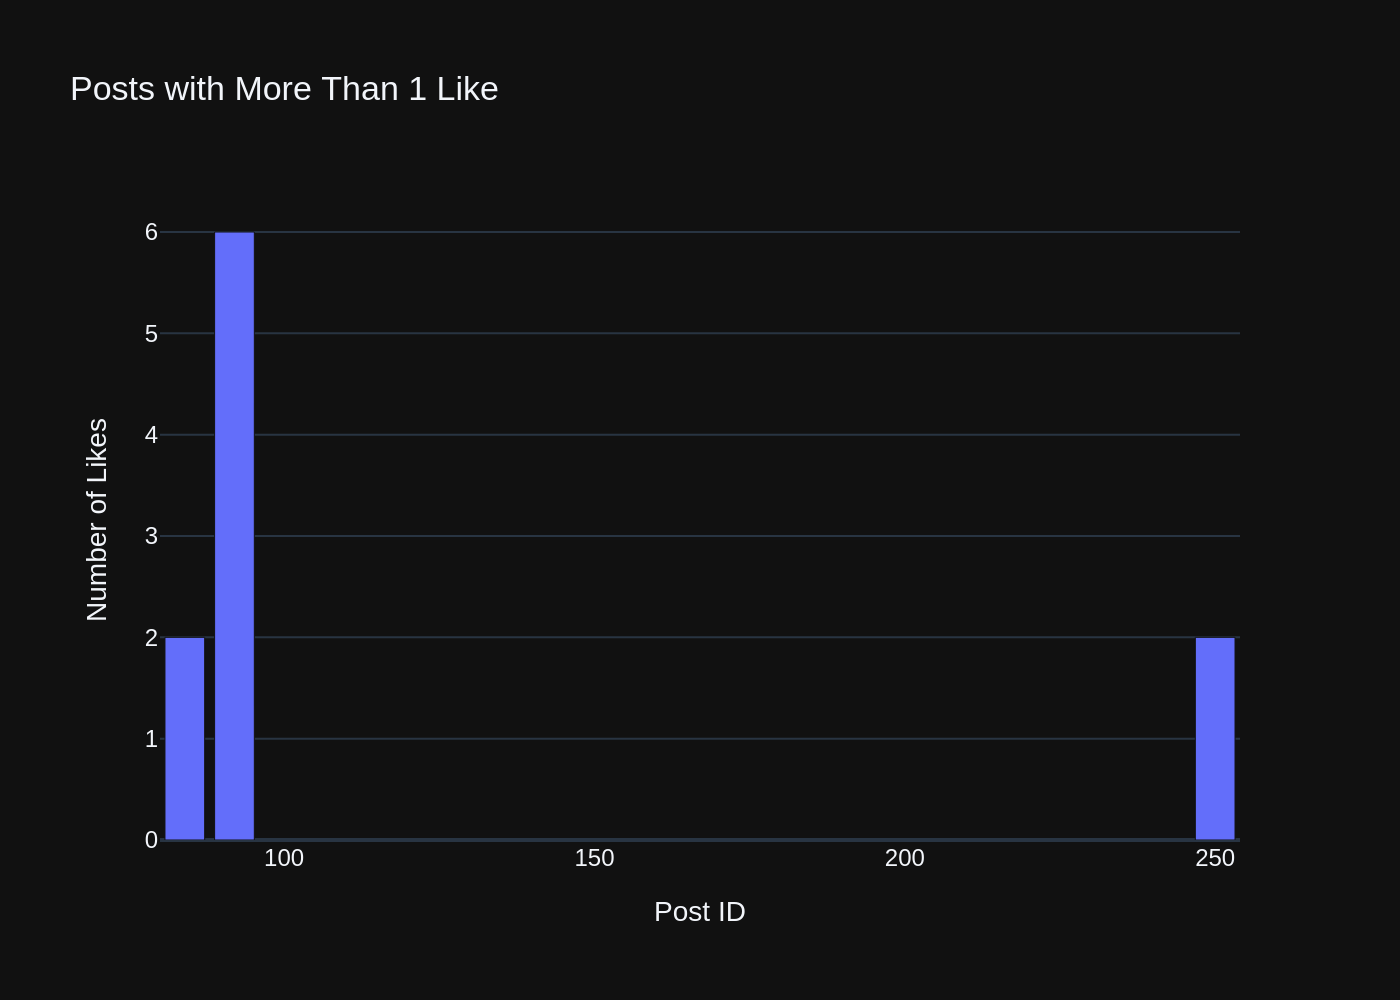

('SELECT * FROM post WHERE num_likes > 1;',
    post_id  user_id  original_post_id  \
 0       84       82               NaN   
 1       92       32               NaN   
 2      250        5              84.0   
 
                                              content  \
 0  police have surrounded this building where the...   
 1          just a crow riding an eagle, nbd. URL URL   
 2  police have surrounded this building where the...   
 
                                        quote_content  created_at  num_likes  \
 0                                               None           0          2   
 1                                               None           0          6   
 2  Urgent situation: Police are surrounding a bui...           4          2   
 
    num_dislikes  num_shares  
 0             0           1  
 1             0           7  
 2             0           1  ,
 Figure({
     'data': [{'hovertemplate': 'Post ID=%{x}<br>Number of Likes=%{y}<extra></extra>',
            

In [24]:
vn.ask("查询下post表中，那些post的num_likes大于1?", allow_llm_to_see_data=True)

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. ===Response Guidelines \n1. If the provided context is sufficient, please generate a valid SQL query without any explanations for the question. \n2. If the provided context is almost sufficient but requires knowledge of a specific string in a particular column, please generate an intermediate SQL query to find the distinct strings in that column. Prepend the query with a comment saying intermediate_sql \n3. If the provided context is insufficient, please explain why it can't be generated. \n4. Please use the most relevant table(s). \n5. If the question has been asked and answered before, please repeat the answer exactly as it was given before. \n6. Ensure that the output SQL is SQLite-compliant and executable, and free of syntax errors. \n"}, {'

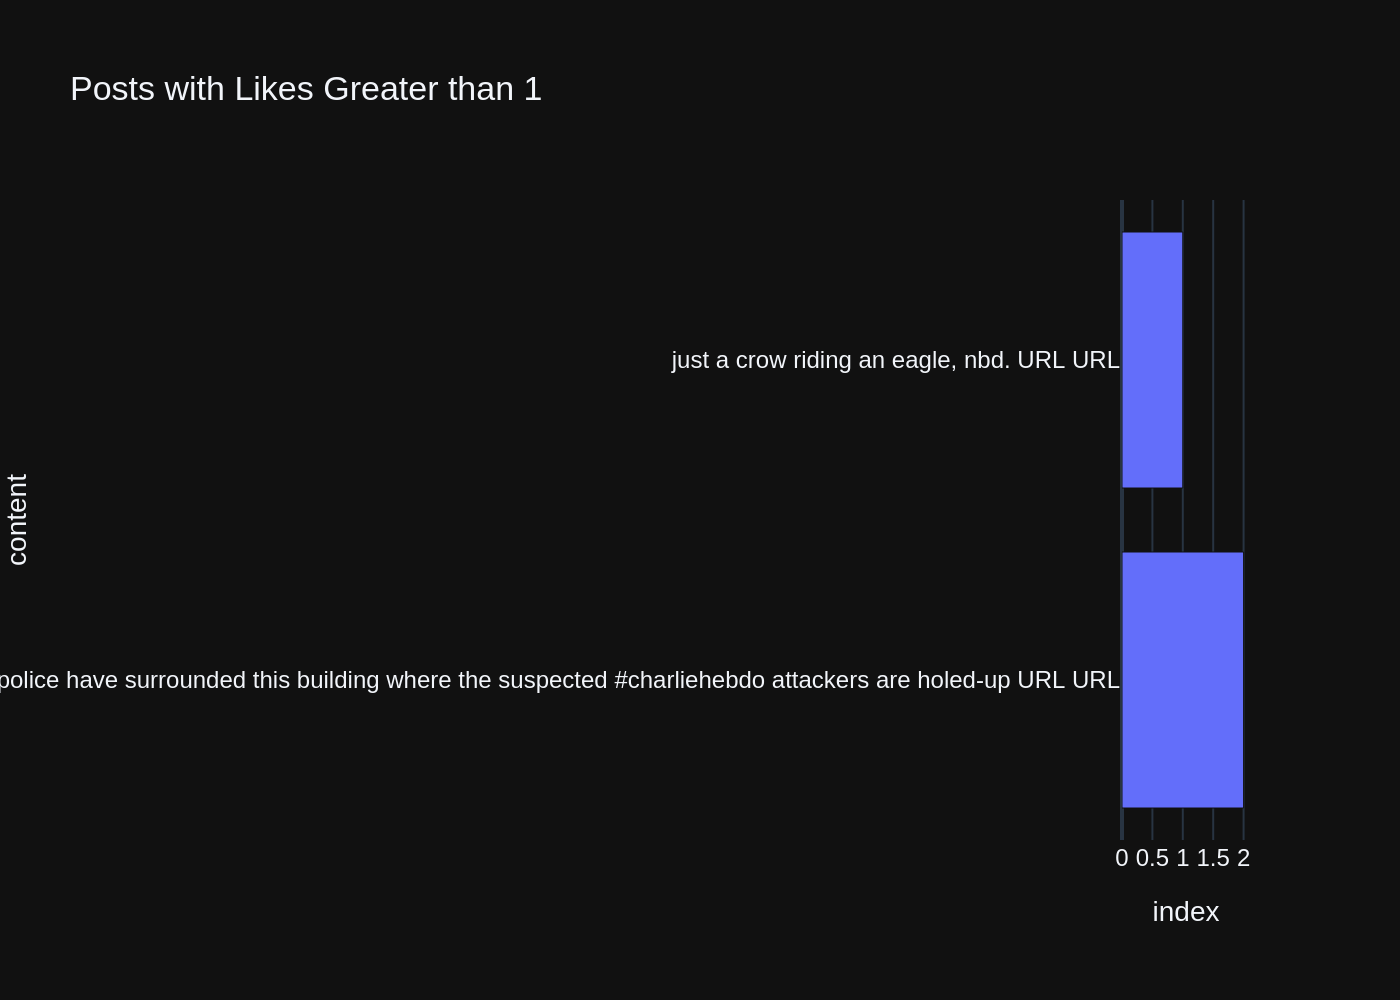

('SELECT content FROM post WHERE num_likes > 1;',
                                              content
 0  police have surrounded this building where the...
 1          just a crow riding an eagle, nbd. URL URL
 2  police have surrounded this building where the...,
 Figure({
     'data': [{'hovertemplate': 'index=%{x}<br>content=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'h',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': {'bdata': 'AAEC', 'dtype': 'i1'},
               'xaxis': 'x',
               'y': array(['police have surrounded this building where the suspected #charliehebdo attackers are holed-up URL URL',
                           'just a crow riding an eagle, nbd. URL URL',
                           'police have surrounded this building where the suspected 

In [26]:
vn.ask("将num_likes大于1的post的content信息打印出来", allow_llm_to_see_data=True)